<a href="https://colab.research.google.com/github/itchyfeet-patient/Beautiful-Exploration/blob/master/Exploration_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ⛳평가항목 루브릭

아래의 기준을 바탕으로 프로젝트를 평가합니다.    

| **평가문항** | **상세기준** |    
|---|---|    
| 1. 프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가? | MSE 손실함수값 3000 이하를 달성 |    
| 2. 프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔는가? | RMSE 값 150 이하를 달성 |    
| 3. 시각화 요구사항이 정확하게 이루어졌는가? | 데이터개수 시각화 및 예측결과 시각화를 진행하였으며, 예측과 실제 데이터가 크게 분리되지 않고 비슷하다. |




# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.
import pandas as pd
import numpy as np
import seaborn as sns
plt.style.use('seaborn')
import missingno as msno # missingno는 결측데이터들을 파악하는데 직관적인 도움을 주는 패키지

#ignore warnings
import warnings
warnings.filterwarnings('ignore') # 경고 메시지를 숨김

%matplotlib inline 
# 캔버스 사이즈 적용
#plt.rcParams["figure.figsize"] = (20, 10)

## (1) 데이터 가져오기

- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text major ticklabel objects>)

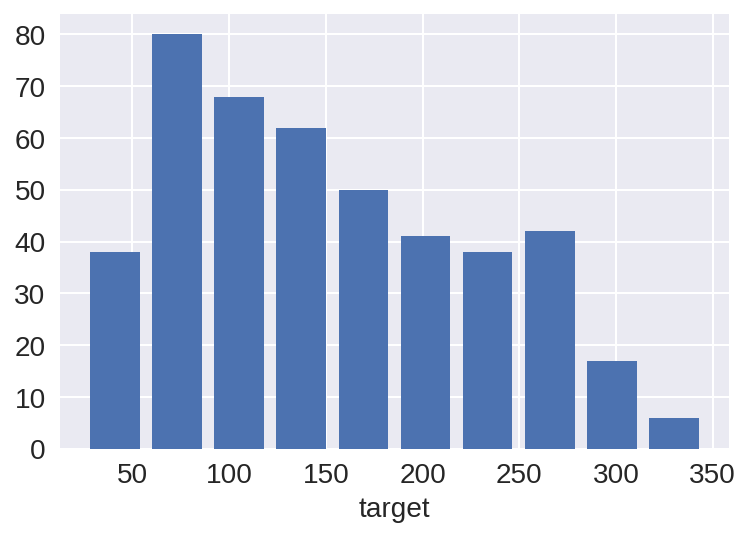

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df_y
plt.hist(df_y, rwidth = 0.8)
plt.xlabel('target', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

---

In [ ]:
diabetes.keys()
# 데이터 키값 확인

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

데이터셋 정보를 본 결과    
분석 target은 **기준선 이후 1년 동안 질병 진행의 정량적 측정** 이라고 하네요

feature name 별 의미

    - age(년)
    - sex
    - bmi 체질량 지수
    - bp 평균 혈압
    - s1 tc, 총 혈청 콜레스테롤
    - s2 ldl, 저밀도 지단백질
    - s3 hdl, 고밀도 지단백질
    - s4 ch, 총 콜레스테롤/HDL
    - s5 ltg, 혈청 트리글리세리드 수준의 로그
    - s6 glu, 혈당 수치


In [ ]:
print(df_X.shape) 
print(df_y.shape)
# 442개의 행과 10개의 column을 가졌군...

(442, 10)
(442,)


In [ ]:
for i, feature_name in enumerate(diabetes.feature_names):
    print(f'feature {i+1} : {feature_name}')

# 나이..성별..bmi...

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [ ]:
print('<df_X[0]> : ',df_X[0])
print()
print('<df_y[0]> : ',df_y[0] )

<df_X[0]> :  [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]

<df_y[0]> :  151.0


----

In [ ]:
import pandas as pd
df_d = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)

In [ ]:
df_d['target'] = diabetes.target
df_d

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [ ]:
df_d.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


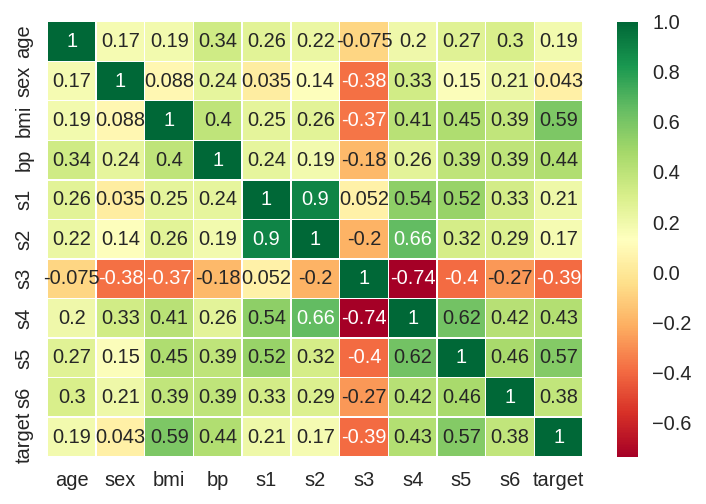

In [ ]:
import seaborn as sns
sns.heatmap(df_d.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)


상관관계 분석을 해 보니, target과 상관관계가 큰 feature는 
- bmi
- bp
- s1
- s3
- s4
- s5
- s6    
이고
- age와 s2는 한 번 고려해봐야겠다.
- sex는 너무 낮다.

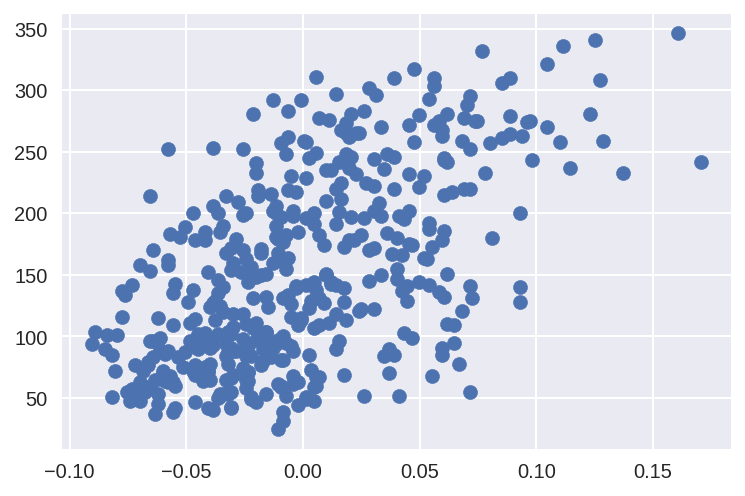

In [ ]:
plt.scatter(df_d['bmi'], df_d['target'])
plt.show()

bmi 와 양의 상관관계를 알 수 있다.

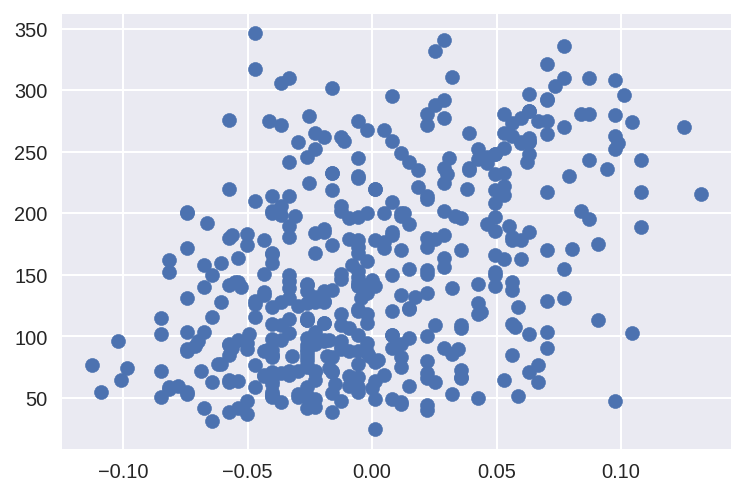

In [ ]:
plt.scatter(df_d['bp'], df_d['target'])
plt.show()

약한 양의 상관관계를 알 수 있다.

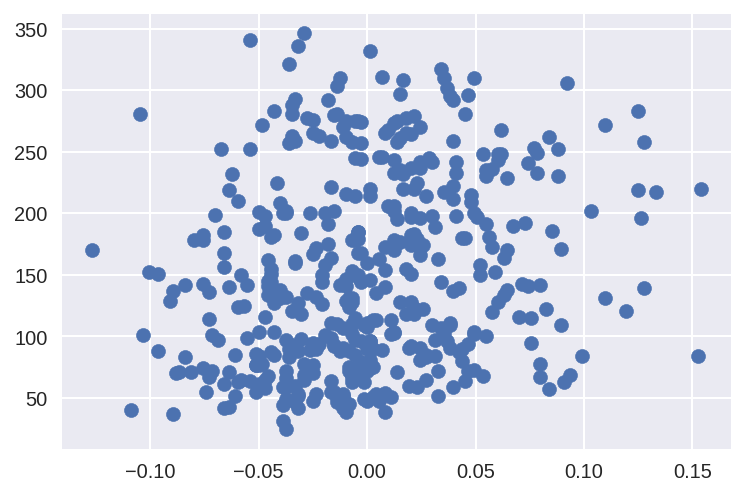

In [ ]:
plt.scatter(df_d['s1'], df_d['target'])
plt.show()

점점 상관관계가 잘 안보인다.

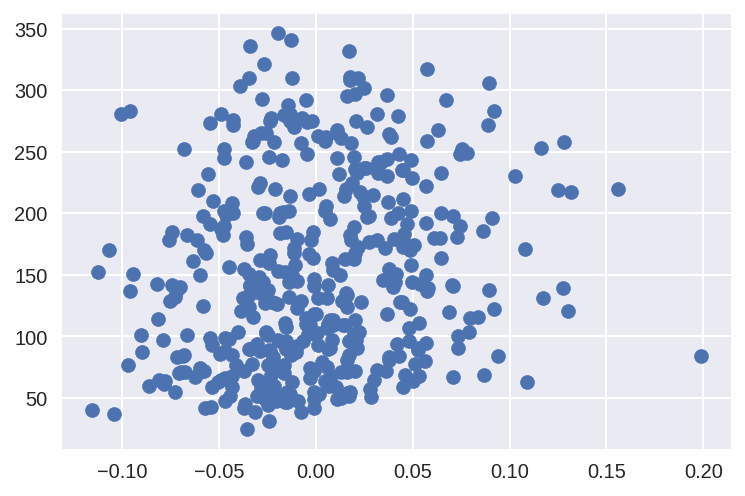

In [ ]:
plt.scatter(df_d['s2'], df_d['target'])
plt.show()

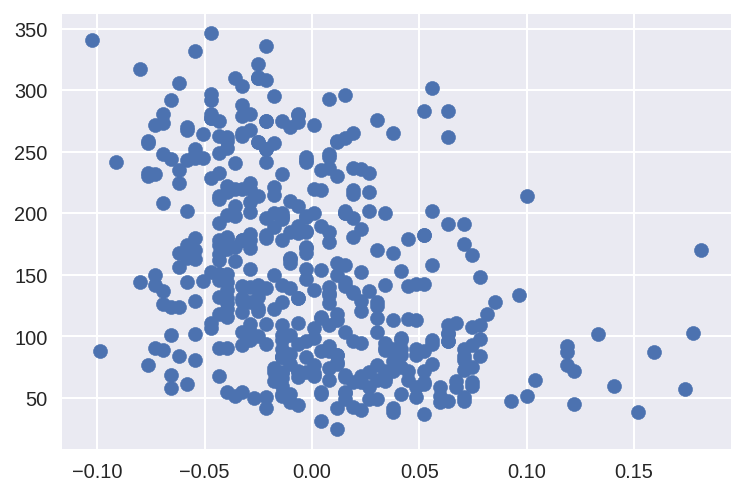

In [ ]:
plt.scatter(df_d['s3'], df_d['target'])
plt.show()

음의 상관관계?

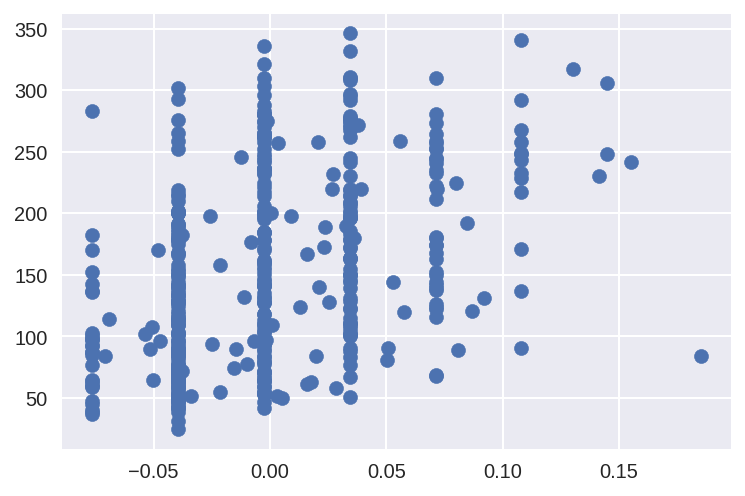

In [ ]:
plt.scatter(df_d['s4'], df_d['target'])
plt.show()

양의 상관관계

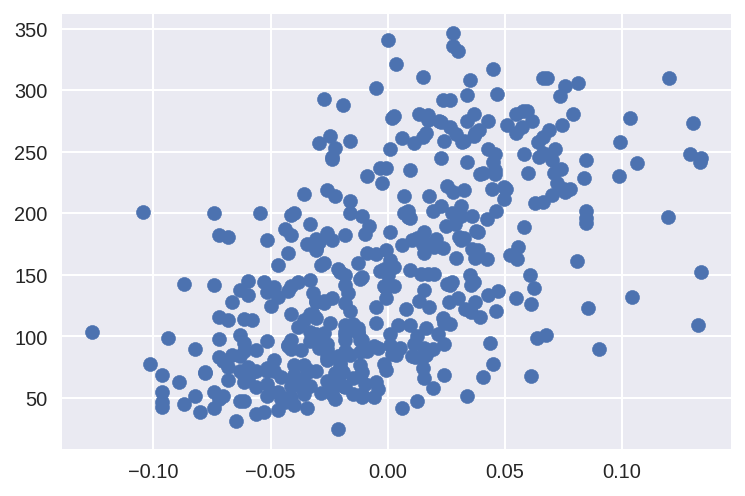

In [ ]:
plt.scatter(df_d['s5'], df_d['target'])
plt.show()

꽤 선명한 양의 상관관계다.

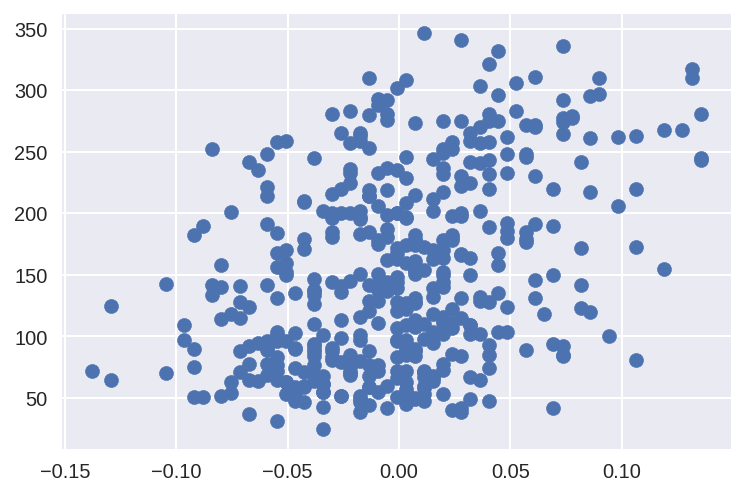

In [ ]:
plt.scatter(df_d['s6'], df_d['target'])
plt.show()

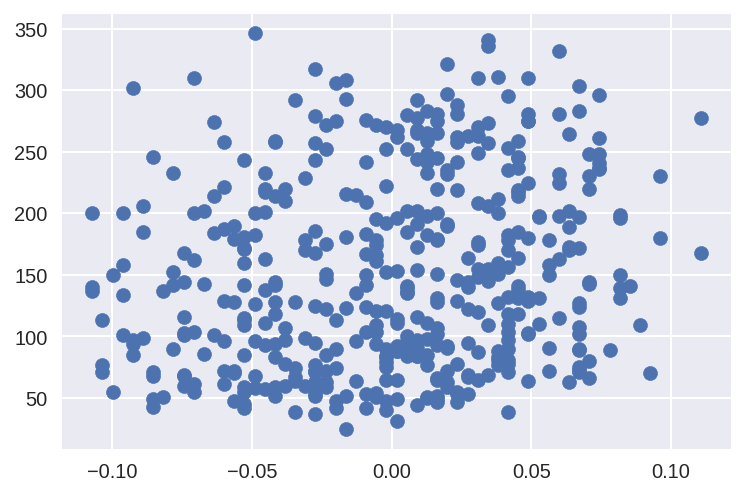

In [ ]:
plt.scatter(df_d['age'], df_d['target'])
plt.show()

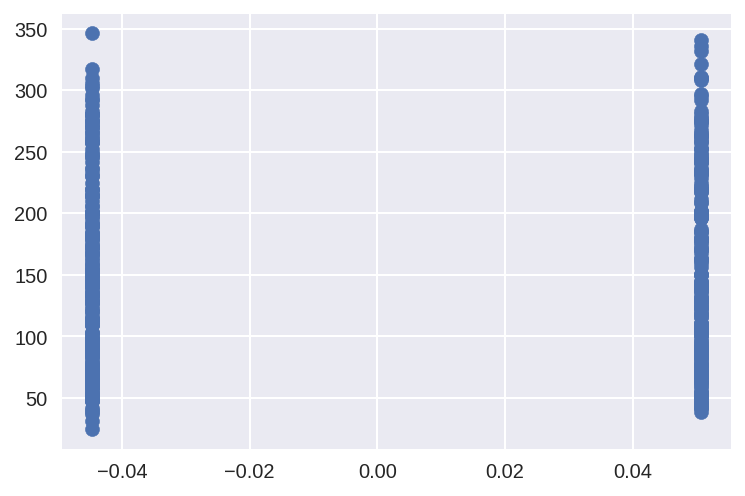

In [ ]:
plt.scatter(df_d['sex'], df_d['target'])
plt.show()

## (2) 모델에 입력할 데이터 X 준비하기

- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [ ]:
df_X = df_d[['age','bmi','bp','s1','s3','s4','s5','s6']].values
type(df_X)

numpy.ndarray

## (3) 모델에 예측할 데이터 y 준비하기

- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [ ]:
type(df_y)

numpy.ndarray

## (4) train 데이터와 test 데이터로 분리하기


- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(309, 8) (309,)
(133, 8) (133,)


## (5) 모델 준비하기

- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

['age', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6']    
8가지의 정보가 있으므로 w = 8, b = 1


In [ ]:
import numpy as np
W = np.random.rand(8)
b = np.random.rand(1)
X = X_train
y = y_train
W
b

array([0.62130736])

In [ ]:
def model(X, W, b):
    predictions = 0
    for i in range(8):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## (6) 손실함수 loss 정의하기


- 손실함수를 MSE 함수로 정의해주세요.

In [ ]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse


In [ ]:
def RMSE(a,b):
    rmse = MSE(a,b) ** 0.5
    return rmse
    

In [ ]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


## (7) 기울기를 구하는 gradient 함수 구현하기


- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [ ]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [ ]:
print(X.shape)
print(W.shape)
print(b.shape)
print(y.shape)

(309, 8)
(8,)
(1,)
(309,)


In [ ]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -66.5692125  -209.80361772 -144.30845591  -72.40977658  121.90905693
 -143.99720108 -174.11336632 -147.41794175]
db: -306.5514838746162


## (8) 하이퍼 파라미터인 학습률 설정하기


- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [ ]:
LEARNING_RATE = 0.1
# 학습 결과에 따라 변경요망

## (9) 모델 학습하기


- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [ ]:
X_train.shape , y_train.shape


((309, 8), (309,))

In [ ]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X, W, b, y)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 4462.3869
Iteration 20 : Loss 3657.7847
Iteration 30 : Loss 3439.9607
Iteration 40 : Loss 3331.7316
Iteration 50 : Loss 3265.4480
Iteration 60 : Loss 3219.7109
Iteration 70 : Loss 3186.2279
Iteration 80 : Loss 3161.0100
Iteration 90 : Loss 3141.7239
Iteration 100 : Loss 3126.8227
Iteration 110 : Loss 3115.2128
Iteration 120 : Loss 3106.0980
Iteration 130 : Loss 3098.8890
Iteration 140 : Loss 3093.1463
Iteration 150 : Loss 3088.5393
Iteration 160 : Loss 3084.8180
Iteration 170 : Loss 3081.7921
Iteration 180 : Loss 3079.3158
Iteration 190 : Loss 3077.2768
Iteration 200 : Loss 3075.5880
Iteration 210 : Loss 3074.1812
Iteration 220 : Loss 3073.0030
Iteration 230 : Loss 3072.0112
Iteration 240 : Loss 3071.1721
Iteration 250 : Loss 3070.4588
Iteration 260 : Loss 3069.8497
Iteration 270 : Loss 3069.3271
Iteration 280 : Loss 3068.8768
Iteration 290 : Loss 3068.4872
Iteration 300 : Loss 3068.1485
Iteration 310 : Loss 3067.8529
Iteration 320 : Loss 3067.5939
Iteration 330 : L

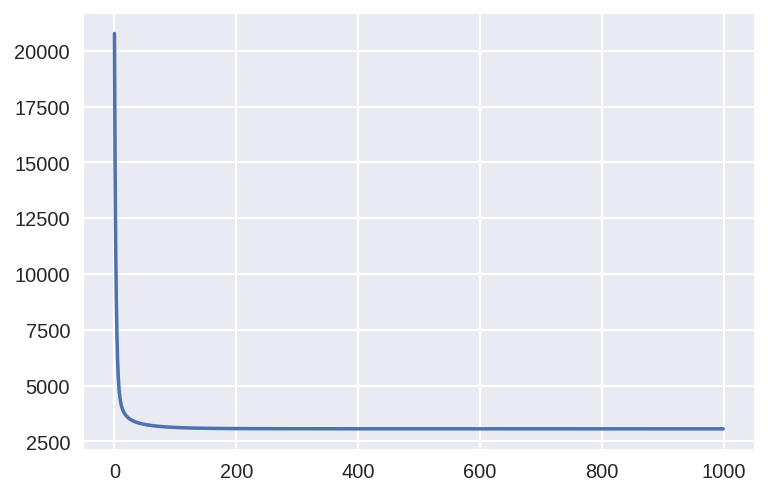

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()


In [ ]:
W, b

(array([   5.24297689,  606.70199158,  337.56321745, -227.87070298,
        -124.22233163,  102.98774397,  447.47749438,   41.27973458]),
 array([150.85863897]))

## (10) test 데이터에 대한 성능 확인하기


- test 데이터에 대한 성능을 확인해주세요.

In [ ]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2875.2173518119366

In [ ]:
rmse = mse**0.5
rmse

53.62105325160945

모든 feature를 다 넣었을 때 mse = 2867이 나왔는데 지금 상관계수 높은 것 끼리 넣었음에도 더 낮게 나왔다. 상관계수가 능사가 아니란 뜻일까?..

## (11) 정답 데이터와 예측한 데이터 시각화하기
    

- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.



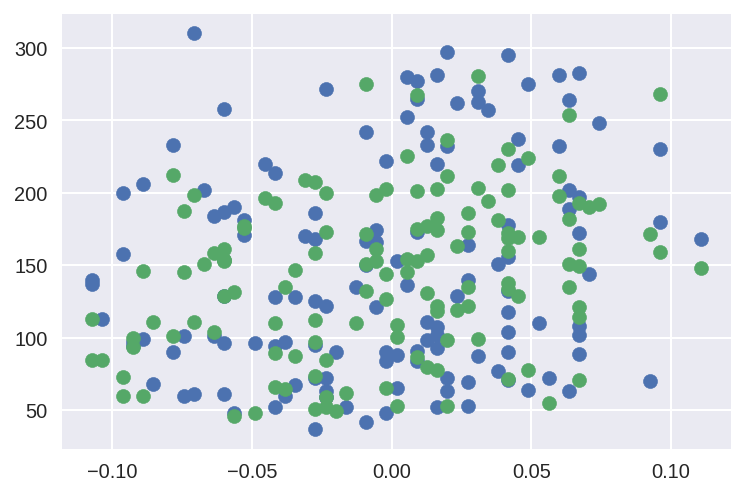

In [ ]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

조금 아쉽지만, 얼추 맞는 것을 확인할 수 있다.

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 **자전거의 대여량을 예측**하는 문제입니다.
자전거 대여량을 결정하는 데에는 시간도 중요할 것이고, 요일이나 계절도 크게 영향을 미칠 것 같습니다.

이번 프로젝트에서는 직접 손실함수와 기울기를 계산하지 않고, 사이킷런(sklearn)의 LinearRegression 모델을 활용할 것입니다.
이 또한 위에서 진행해봤던 순서 그대로 진행하시면 됩니다!

## (1) 데이터 가져오기


- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.

In [ ]:
df_train= pd.read_csv('../content/train.csv')
df_test = pd.read_csv('../content/test.csv')

FileNotFoundError: ignored

In [ ]:
df_train.head()

## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기


- to_datetime 활용 : 링크 참조
- pandas datetime extract year month day 키워드로 검색해 보기

In [ ]:
df_train['datetime'] # datetime의 자료형은 object다! 바꿔주자!
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_train['datetime'] # datetime으로 바뀌었다!

In [ ]:
df_train['year'] = df_train['datetime'].dt.year # 연도 정보
df_train['month'] = df_train['datetime'].dt.month # 월 정보
df_train['day'] = df_train['datetime'].dt.day # 일 정보
df_train['hour'] = df_train['datetime'].dt.hour # 시간 정보
df_train['minute'] = df_train['datetime'].dt.minute # 분 정보
df_train['second'] = df_train['datetime'].dt.second # 초 정보

In [ ]:
df_train.head() # 잘 담겨짐

In [ ]:
df_train.describe()

총17개의 column이 되었다! 해당 column의 설명을 데이터셋에서 찾아보자면,
- datetime - 시간별 날짜 + 타임스탬프
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - 그 날이 휴일인지 여부
- workingday - 그 날이 주말도 휴일도 아닌지 여부
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
            2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - 섭씨온도
- atemp - "체감" 섭씨온도
- humidity - 상대습도
- windspeed - wind speed
- casual - 미등록 사용자 대여 횟수
- registered - 등록 사용자 대여 횟수
- count - 총 대여 횟수

## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기


- sns.countplot 활용해서 시각화하기
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

In [ ]:
#df_train.groupby(['year','month','day','hour','minute','second'])['year'].size()
#sns.countplot()

f, ax = plt.subplots(2, 3, figsize=(20,10))
sns.countplot('year', data=df_train, ax = ax[0,0],palette='Purples')
ax[0,0].set_title('year')
ax[0,0].set_ylim(5000, 6000)
ax[0,0].set_yticks([5000, 5200, 5400, 5600, 5800, 6000])
sns.countplot('month', data = df_train, ax = ax[0,1], palette='GnBu')
ax[0,1].set_title('month')
ax[0,1].set_ylim(800, 950)
ax[0,1].set_yticks([800,820, 840,860, 880,900,920,940])
sns.countplot('day', data = df_train, ax = ax[0,2],palette = 'PuBu')
ax[0,2].set_title('day')
ax[0,2].set_ylim(500, 600)
ax[0,2].set_yticks([500,520, 540,560, 580,600])
sns.countplot('hour', data=df_train, ax=ax[1,0], palette = 'Blues')
ax[1,0].set_title('hour')
ax[1,0].set_ylim(420, 470)
ax[1,0].set_yticks([420,430,440,450,460,470])
sns.countplot('minute', data=df_train, ax=ax[1,1],palette = 'Purples')
ax[1,1].set_title('minute')
ax[1,1].set_ylim(0, 13000)
sns.countplot('second', data=df_train, ax=ax[1,2],palette = 'Purples')
ax[1,2].set_title('second')
ax[1,2].set_ylim(0, 13000)

plt.subplots_adjust(wspace=0.2, hspace=0.5)


plt.show()

- 여기서 눈에 띄는 점은, minute과 second는 0으로만 채워져 있다는 것이네요!


In [ ]:
print(df_train['minute'].max)
print(df_train['second'].max)

볼 필요도 없지만 max값을 출력해 보니 역시나 0이네요.    
minute, second는 의미없는 값으로 간주하고 삭제하도록 하겠습니다.

In [ ]:
df_train.drop(['minute','second'], axis = 1, inplace = True)
df_train

잘 지워졌네요.

## (4) X, y 컬럼 선택 및 train/test 데이터 분리


- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

---

그래서 먼저 데이터 간의 상관관계를 살펴보기로 했습니다.
그 전에 column names의 의미를 한 번 알아보겠습니다.

- datetime - 시간별 날짜 + 타임스탬프
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - 그 날이 휴일인지 여부
- workingday - 그 날이 주말도 휴일도 아닌지 여부
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
            2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - 섭씨온도
- atemp - "체감" 섭씨온도
- humidity - 상대습도
- windspeed - wind speed
- casual - 미등록 사용자 대여 횟수
- registered - 등록 사용자 대여 횟수
- count - 총 대여 횟수

대충 보니 **시간**, **계절** ,**날씨**, **휴일**, **온도**, **체감온도** 이정도가 강한 영향을 미칠 것 같은데요. 

In [ ]:
plt.rcParams['figure.figsize'] = [13, 13]
# 위 코드는 그래프 그리기 전에 해줘야 적용이 됨
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu', linewidths=0.2)


- month와 season은 당연하게도 상관관계가 강하죠?
- temp와 atemp도 마찬가지입니다.
- 우리가 볼 것은 count와 다른 feature들의 상관관계인데요, 
- registered와 casual이 높네요. 그런데 이것도 registered + casual = count 라서 상관관계가 커 보입니다. 총 count 중에서 registered 비중은 관심있게 볼 수도 있겠네요. 
    - hour : 0.4
    - temp : 0.39
    - atemp : 0.39
    - humidity : -0.32
* 이 정도가 유의미해보입니다.

상관관계가 낮아 보이는 항목은
- day : 0.02
- workingday : 0.012 ⭐
- holiday : -0.0054 ⭐
- month : 0.17
- weather : -0.13
- season : 0.16
- windspeed : 0.1

In [ ]:
f, ax = plt.subplots(4, 3, figsize=(20,10))
sns.scatterplot(x = "season", y = "count", data=df_train, ax = ax[0,0])
sns.scatterplot(x = "holiday", y = "count", data=df_train, ax = ax[0,1])
sns.scatterplot(x = "workingday", y = "count", data=df_train, ax = ax[0,2])
sns.scatterplot(x = "weather", y = "count", data=df_train, ax = ax[1,0])
sns.scatterplot(x = "temp", y = "count", data=df_train, ax = ax[1,1])
sns.scatterplot(x = "atemp", y = "count", data=df_train, ax = ax[1,2])
sns.scatterplot(x = "humidity", y = "count", data=df_train, ax = ax[2,0])
sns.scatterplot(x = "windspeed", y = "count", data=df_train, ax = ax[2,1])
sns.scatterplot(x = "year", y = "count", data=df_train, ax = ax[2,2])
sns.scatterplot(x = "month", y = "count", data=df_train, ax = ax[3,0])
sns.scatterplot(x = "day", y = "count", data=df_train, ax = ax[3,1])
sns.scatterplot(x = "hour", y = "count", data=df_train, ax = ax[3,2])

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

- 일단 day는 확실히 의미 없어보여서 제외하기로 합니다.
- 상관관계 분석 표로 봤을 때 보다 의외로 관계있어 보이는 feature들이 많습니다. 다 포함하기로 합니다.(day, 상관관계가 너무 낮은 workingday, holiday 빼고)

---

X에 train 데이터인 hour, temp, atemp, humidity 값을 넣었습니다.

In [ ]:
X = df_train[['hour','temp', 'atemp', 'humidity', 'season', 'weather', 'windspeed', 'month','year']].values
X
X.shape

y에 target 데이터인 count값을 넣었습니다.

In [ ]:
y = df_train['count'].values
y
y.shape

---

## (5) LinearRegression 모델 학습


- sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics # 모델의 평가를 위해 씀
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

수렴할 때까지 얼마나 반복할 것인지, 학습률은 얼마로 할 것인지. 정해왔었는데 여기서는 이렇게 복잡하게 고려하지 않아도 된다. ([1]참고)   
sklearn 단순 선형회귀에서는 **최소제곱법**을 활용하기 때문이다.    
- 어떤 계의 해방정식을 근사적으로 구하는 방법으로, 근사적으로 구하려는 해와 실제 해의 오차의 제곱의 합(SS)이 최소가 되는 해를 구하는 방법이다.
- 이 방법은 값을 정확하게 측정할 수 없는 경우에 유용하게 사용될 수 있으며, 특히 그 계의 방정식이 어떤 형태인지를 알고 있을 때 방정식의 상수 값들을 추정하는 데에 사용된다.
- $y = ax + b$ 를 사용.



---



## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산


- 학습된 모델에 X_test를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [ ]:
y_pred = model.predict(X_test)
# .values.reshape(-1,1)
y_pred.shape

In [ ]:
W = model.coef_ #기울기
W

In [ ]:
b = model.intercept_ # y절편
b

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

In [ ]:
rmse = mse ** 0.5
rmse

---

## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기


- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

In [ ]:
# temp
plt.scatter(X_test[:, 1], y_test, c = 'red')
plt.scatter(X_test[:, 1], y_pred, c = 'blue')
plt.show()

In [ ]:
# humidity
plt.scatter(X_test[:, 3], y_test, c = 'red')
plt.scatter(X_test[:, 3], y_pred, c = 'blue')
plt.show()



---



# 회고

1. 결과값이 이상하게 나와서(mse값이 27812..!) 코드를 한 줄 한 줄 리뷰해봤는데 column을 4개 넣어줬는데도 shape에서 1개만 나오는 것이 이상했고, train test split하기 전 그래프를 그릴 때 X와 y값에 덮어쓰기가 되었던 것임을 알았다!! 
    - 찾느라 꽤 고생했다. 그래프 그릴 때 주의해야겠습니다..
2. 이 데이터셋은 feature가 12개였고, 그 중 사용한 것은 9개였는데 어떤 데이터셋을 사용할 지 고민하는 과정이 좀 힘들었다. 나는 상관분석을 했는데 **어느정도가 상관계수가 낮은 건지, 걸러내는 기준이 불명확해서** 몇개씩 넣었다 뺐다 하는 과정을 보내야 했다.
    - 그리고 **상관계수가 너무 낮지 않음에도** 그래프를 그려보니, 생각해보니, count라는 target에 학습할 때 상관없을 feature들이 존재했다.(casual, registered, day...) 여러모로 이렇게 저렇게 신경써야 더 좋은 예측결과를 내놓는구나 생각했다.
3. 노드에서 실습했던 손실함수 계산에서 더 나아가 심화학습을 했다고 생각한다. 손실을 줄이는 게 꽤나 힘든 과정이라는 것을 또 느꼈다.
4. 평가기준을 모르고 계신 분이 있어서 알려드렸고, 뿌듯했다. 내가 별 하나 지켜드린거에요 - 😀 ⭐
5. 프로젝트 2의 rmse 값을 줄여나가면서 쾌감을 느꼈다. 기준이 150 이하인데 더 줄이고 싶다는 생각에 집착하게 됐다.. 👼
6. 프로젝트 1에서 X에 들어가는 특성 컬럼을 몇 개 빼도 된다고 하셔서 그렇게 했는데 안 뺀 것보다 mse값이 더 높게 나왔다.어떤 컬럼을 빼야 하는지 좀 갈피가 안 잡힌다. 분명 상관계수가 낮다고 생각한 것을 뺐는데도 높게 나온게.. 이해가 잘 안된다? 상관계수 말고 다른 척도가 있는걸까?

---

>**참고문헌**

[1] linear regression 참고 https://hleecaster.com/ml-linear-regression-example/